In [1]:
%aiida
from aiida import load_dbenv, is_dbenv_loaded
from aiida.backends import settings
if not is_dbenv_loaded():
    load_dbenv(profile=settings.AIIDADB_PROFILE)

In [5]:
from aiida.orm.code import Code
from aiida.orm import Code, Computer
from aiida.orm.querybuilder import QueryBuilder
from aiida.orm.data.base import Int, Float, Str, Bool
from aiida.orm.data.parameter import ParameterData
from aiida.work.run import submit
from aiida.orm.data.structure import StructureData

In [20]:
## -------------------------------------------------------
## Select computer and code
qb = QueryBuilder()
qb.append(Computer, filters={'enabled': True}, project='name', tag='computer')
qb.append(Code, project='*', has_computer='computer', filters={'attributes.input_plugin': 'cp2k'})
qb.order_by({Code: {'id': 'asc'}})

print(qb.all())
computer, code = qb.all()[1]
## -------------------------------------------------------

[[u'daint-s746', <Code: Remote code 'cp2k_6.0_18265' on daint-s746, pk: 214, uuid: f29f8268-2d86-4d8c-9fe8-cb491575db42>], [u'daint-s746-normal', <Code: Remote code 'cp2k_6.0_18265' on daint-s746-normal, pk: 1078, uuid: 2b831656-7e4e-4ede-b4a1-e7868ed86c34>]]


In [13]:
qb = QueryBuilder()
qb.append(Code)

print(qb.all())

[[<Code: Remote code 'q2r-6.1' on daint-s746-normal, pk: 1084, uuid: 64e560da-4786-495c-8d17-dc3cc2bf0bd4>], [<Code: Remote code 'matdyn-6.1' on daint-s746-normal, pk: 1083, uuid: 9aa49b21-3826-42ba-be10-916eabfc92ff>], [<Code: Remote code 'projwfc-6.1' on daint-s746-normal, pk: 1082, uuid: f53c4538-4c35-4c42-be3d-253fa7769990>], [<Code: Remote code 'ph-6.1' on daint-s746-normal, pk: 1081, uuid: 2fe4aff7-16fb-453e-9a8b-1ff33199ed19>], [<Code: Remote code 'pp-6.1' on daint-s746-normal, pk: 1080, uuid: 6e44c37a-8f03-485b-bae4-e83d1c7fad52>], [<Code: Remote code 'pw-6.1' on daint-s746-normal, pk: 1079, uuid: 409de94c-2397-41de-a832-cb43dd242320>], [<Code: Remote code 'cp2k_6.0_18265' on daint-s746-normal, pk: 1078, uuid: 2b831656-7e4e-4ede-b4a1-e7868ed86c34>], [<Code: Remote code 'q2r-6.1' on daint-s746, pk: 220, uuid: a59fde03-84a6-4b1a-9333-9ccc63a90c1c>], [<Code: Remote code 'matdyn-6.1' on daint-s746, pk: 219, uuid: 75226995-05f2-4f0b-accc-82fde07302fd>], [<Code: Remote code 'projwfc-

In [14]:
## -------------------------------------------------------
## Select structure

qb = QueryBuilder()
qb.append(StructureData)

for i, str_data in enumerate(qb.all()):
    n = str_data[0]
    print(i, n.description)

struct_data = qb.all()[6][0]

(0, u'upload_5derivative_3_kris')
(1, u'upload_5derivative_3_kris.scale(0.938)')
(2, u'upload_5dervivative_3_corrected2_kris')
(3, u'upload_5dervivative_3_corrected2_kris.scale(0.938)')
(4, u'C24H12 upload_5dervivative_3_corrected2_kris.scale(0.938) cell(15, 51)')
(5, u'upload_5dervivative_3_corrected2_kris.scale(0.938).slab(9,4,6)')
(6, u'upload(C40H248Au896)_indenof_o_h_final')
(7, u'upload(C40H250Au896)_indenof_o_h2_final')
(8, u'upload(C40H250Au896)_indenof_o_h_final')
(9, u'upload(C40H248Au896)_indenof_o_h_final')
(10, u'upload(C40H250Au896)_indenof_o_h2_final')
(11, u'')
(12, u'')
(13, u'')
(14, u'')
(15, u'')
(16, u'')
(17, u'')
(18, u'')
(19, u'')
(20, u'')
(21, u'')
(22, u'')
(23, u'')
(24, u'')
(25, u'')
(26, u'')
(27, u'')
(28, u'upload(C2H2)_rot')
(29, u'upload(C2H2)')
(30, u'upload(C2H2)_real')


In [15]:
struct_data.get_ase()

Atoms(symbols='C40H248Au896', pbc=False, cell=[40.35367275, 40.59089532, 13.42407524], masses=...)

In [16]:
from apps.stm.stm_workchain import STMWorkChain

In [17]:
outputs = submit(STMWorkChain,
                 cp2k_code=code,
                 structure=struct_data,
                 vdw_switch=Bool(True))
print(outputs)

RunningInfo(type=<RunningType.PROCESS: 0>, pid=1094)


In [16]:
outputs.pid

1061

In [9]:
the_workcalc = load_node(outputs.pid)

In [10]:
the_workcalc.get_attrs()

{u'_aborted': False,
 u'_finished': True,
 u'_process_label': u'STMWorkChain',
 u'_sealed': True}

In [11]:
the_workcalc.get_extras()

{}

In [12]:
the_workcalc

<WorkCalculation: uuid: a1b6fd8d-baaa-4e18-8ad2-25893c737108 (pk: 1016)>

In [14]:
the_workcalc.get_inputs_dict()

{u'cp2k_code': <Code: Remote code 'cp2k_6.0_18265' on daint-s746, pk: 214, uuid: f29f8268-2d86-4d8c-9fe8-cb491575db42>,
 u'mgrid_cutoff': 600,
 u'structure': <StructureData: uuid: 60118d76-89de-4d92-8d99-538715ece5ae (pk: 940)>,
 u'vdw_switch': False}

In [15]:
the_workcalc.get_outputs()

[<Cp2kCalculation: uuid: 181ade36-1fc4-4100-a479-da769d199b39 (pk: 1020)>]

In [16]:
a = the_workcalc.get_outputs()[0]
a.get_outputs()

[<RemoteData: uuid: 69cf93ba-0499-4a13-82c6-78e6b6c28753 (pk: 1021)>,
 <FolderData: uuid: 249971b5-ed55-4c78-8330-f2c0bd23fcfc (pk: 1022)>,
 <ParameterData: uuid: 575e92d7-0edd-44b2-b328-cbd122592643 (pk: 1023)>]

In [17]:
b = a.get_outputs()[1]

In [18]:
path = b.get_abs_path() + "/path/"
files = b.get_folder_list()
files

[u'aiida.out',
 u'aiida-RESTART.wfn',
 u'_scheduler-stdout.txt',
 u'BASIS_MOLOPT',
 u'_scheduler-stderr.txt',
 u'aiida.inp']

# Orbital analysis

In [51]:
import time
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import my_apps.stm.cp2k_stm_utilities as csu


ang_2_bohr = 1.0/0.52917721067
hart_2_ev = 27.21138602

In [20]:
file_cp2k_inp = path + "aiida.inp"
file_restart = path + "aiida-RESTART.wfn"
file_basis_set = path + "BASIS_MOLOPT"

In [33]:
emin = -20.0
emax = 20.0

In [34]:
time1 = time.time()
elem_basis_names, cell = csu.read_cp2k_input(file_cp2k_inp)
print("Read cp2k input: %.3f" % (time.time()-time1))

time1 = time.time()
basis_sets = csu.read_basis_functions(file_basis_set, elem_basis_names)
print("Read basis sets: %.3f" % (time.time()-time1))

time1 = time.time()
morb_composition, morb_energies, morb_occs, homo_inds = csu.load_restart_wfn_file(file_restart, emin, emax)
print("Found %d orbitals" % len(morb_energies[0]))
print("Read restart: %.3f" % (time.time()-time1))

Read cp2k input: 0.000
Read basis sets: 0.005
('HOMO energy', -0.23218889042968352)
('First molecular index in energy range: ', 0)
Found 15 orbitals
Read restart: 0.003


In [91]:
ase_atoms = struct_data.get_ase().copy()
ase_atoms.positions

array([[ 2.        ,  2.12345678,  1.9999    ],
       [ 3.063     ,  2.        ,  2.        ],
       [ 4.282     ,  2.06      ,  2.05      ],
       [ 5.345     ,  2.03      ,  2.02      ]])

In [92]:
csu.center_atoms_to_cell(ase_atoms.positions, cell/ang_2_bohr)
ase_atoms.positions

array([[ 3.3275    ,  3.06172839,  2.97495   ],
       [ 4.3905    ,  2.93827161,  2.97505   ],
       [ 5.6095    ,  2.99827161,  3.02505   ],
       [ 6.6725    ,  2.96827161,  2.99505   ]])

In [93]:
homo_inds

[[4], [5], [5]]

In [94]:
morb_energies

[array([ -1.14413211e+01,  -7.06163726e+00,  -5.12206352e+00,
         -1.26802847e-02,   0.00000000e+00,   6.68396064e+00,
          6.80315508e+00,   7.63082593e+00,   9.33494766e+00,
          1.04592056e+01,   1.06408046e+01,   1.61750436e+01,
          1.62418398e+01,   1.79093278e+01,   1.90365879e+01])]

In [95]:
morb_occs

[array([ 2.,  2.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.])]

In [96]:
# Define real space grid
# Cp2k chooses close to 0.08 angstroms (?)
step = 0.16 
step *= ang_2_bohr
cell_n = (np.round(cell/step)).astype(int)

In [97]:
# define evaluation region:

x_eval_region = None
y_eval_region = None
z_eval_region = None

eval_regions = [x_eval_region, y_eval_region, z_eval_region]

origin = np.zeros(3)
new_cell = np.copy(cell)

for i, e_reg in enumerate(eval_regions):
    if e_reg is None:
        origin[i] = 0.0
        new_cell[i] = cell[i]
    else:
        origin[i] = e_reg[0]
        new_cell[i] = e_reg[1] - e_reg[0]

In [98]:
morb_grids = csu.calc_morbs_in_region(cell, cell_n,
                                      ase_atoms,
                                      basis_sets, morb_composition,
                                      x_eval_region = x_eval_region,
                                      y_eval_region = y_eval_region,
                                      z_eval_region = z_eval_region,
                                      eval_cutoff = 12.0
                                     )

('Global cell: ', array([63, 38, 38]))
('Eval cell: ', array([63, 38, 38]))
('local cell: ', array([76, 76, 76]))
---- Setup: 0.0055
---- Radial calc time : 2.183568
---- Spherical calc time : 0.092972
---- Loc -> loc_morb time : 0.986342
---- loc_morb -> glob time : 0.165619
---- Total time: 3.5732


In [99]:
morb_grids[0].shape

(15, 63, 38, 38)

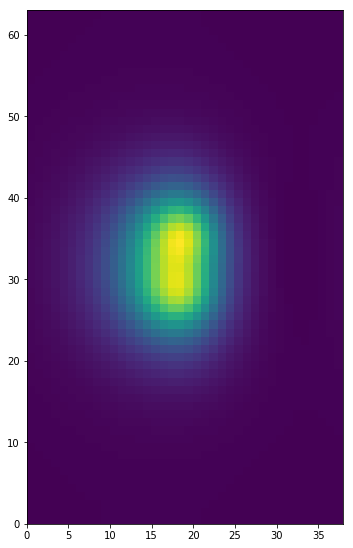

In [123]:
plt.figure(figsize=(cell[1]/2, cell[0]/2))

plt.pcolormesh(morb_grids[0][4][:, :, 24])
plt.show()